In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = os.path.abspath("C:/Users/Nikita/jupyter_notebooks/datasets/animal10")

# 3:color or 1:grayscale
depth = 3
image_size_y = 32
image_size_x = 32

image_data = []
image_class = []

In [17]:
for i, dir in enumerate(os.listdir(dataset_path)):
    class_dir = (dataset_path + '/' + dir)
    for image in os.listdir(class_dir):
        image_file = class_dir + '/' + image
        img = cv2.imread(image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        res = cv2.resize(img, dsize=(image_size_y, image_size_x), interpolation=cv2.INTER_CUBIC)
        image_data.append(res)
        image_class.append(i)
        
image_data = np.array(image_data, dtype='float32')
image_class = np.array(image_class, dtype='float32')

train_image, test_image, train_label, test_label = train_test_split(image_data,
                                                                    image_class,
                                                                    test_size=0.2)

In [20]:
import pickle

with open('datasets/test_data_animal10_32.pkl', 'wb') as file:
    test_set = (test_image, test_label)
    pickle.dump(test_set, file)
    

with open('datasets/train_data_animal10_32.pkl', 'wb') as file:
    train_set = (train_image, train_label)
    pickle.dump(train_set, file)

## Load Data

In [42]:
file = open('datasets/test_data_animal10_32.pkl', 'rb')
test_image, test_label = pickle.load(file)
file.close()

file = open('datasets/train_data_animal10_32.pkl', 'rb')
train_image, train_label = pickle.load(file)
file.close()

In [43]:
with open('datasets/x_animal10_32.npy', 'wb') as f:
    np.save(f, train_image)
    
with open('datasets/y_animal10_32.npy', 'wb') as f:
    np.save(f, train_label)

In [44]:
with open('datasets/x_animal10_32.npy', 'rb') as f:
    train_image = np.load(f)
    
with open('datasets/y_animal10_32.npy', 'rb') as f:
    train_label = np.load(f)

In [51]:
train_image.shape[0]

20943

In [45]:
def process_data(train_image, train_label):
    depth = 3
    image_size_y = 32
    image_size_x = 32
    
    train_image = train_image.reshape(len(train_image), image_size_x, image_size_y, depth)
    train_image = train_image / 255.0

    return (train_image, train_label)

In [46]:
train_image, train_label = process_data(train_image, train_label)

In [5]:
inp = (32, 28, 27, 1)
inp[3]

1

8.0
(32, 32, 3)


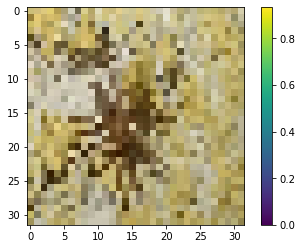

In [47]:
import matplotlib.pyplot as plt
n = 2
img = train_image[n]
print(train_label[n])
print(img.shape)

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

## Model

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
input_shape = (32, 32, 3)
num_classes=10

global_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
    )

global_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
global_model.fit(train_image, train_label, epochs=10)

Epoch 1/10
655/655 [==============================] - 25s 37ms/step - loss: 1.9748 - accuracy: 0.3029
Epoch 2/10
655/655 [==============================] - 25s 37ms/step - loss: 1.6024 - accuracy: 0.4433
Epoch 3/10
655/655 [==============================] - 25s 38ms/step - loss: 1.4104 - accuracy: 0.5146
Epoch 4/10
655/655 [==============================] - 25s 38ms/step - loss: 1.3100 - accuracy: 0.5503
Epoch 5/10
655/655 [==============================] - 25s 38ms/step - loss: 1.2172 - accuracy: 0.5805
Epoch 6/10
655/655 [==============================] - 25s 38ms/step - loss: 1.1428 - accuracy: 0.6102
Epoch 7/10
655/655 [==============================] - 25s 38ms/step - loss: 1.0842 - accuracy: 0.6296
Epoch 8/10
655/655 [==============================] - 25s 38ms/step - loss: 1.0368 - accuracy: 0.6436
Epoch 9/10
655/655 [==============================] - 25s 38ms/step - loss: 0.9863 - accuracy: 0.6617
Epoch 10/10
655/655 [==============================] - 25s 38ms/step - loss: 0.942